<h1><center>YanP_02</center></h1>


<h3 align="center">Nov 22, 2022</h3> 

0.1  Student: Yan, Puwentao (V00031753)
## 1 Problem 2

1. Lloyd

In [13]:
import numpy as np
import sys
from keras.datasets import fashion_mnist
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import MinMaxScaler

In [14]:
_, (x_test, y_test) = fashion_mnist.load_data()
np.random.seed(1337)
# downsample the dataset
y_index = y_test.argsort() # sort labels and return their index
x_temp = np.zeros((5000, 28, 28), dtype=int)
y_temp = np.zeros((5000, ), dtype=int)
for i in range(10):
  x_temp[i*500:i*500+500] = x_test[y_index][i*1000:i*1000+500]
  y_temp[i*500:i*500+500] = y_test[y_index][i*1000:i*1000+500]
x_test = StandardScaler().fit_transform(x_temp.reshape(5000, 784)) # 784 dims
#x_test = x_temp
y = y_temp.reshape(5000,)

d = 30
pca = PCA(n_components=d)
pca.fit(x_test)

components = pca.transform(x_test)
x = pca.inverse_transform(components)

In [18]:
# Lloyd this algorithm is inspired by "https://www.youtube.com/watch?v=vtuH4VRq1AU"
def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1 - x2) ** 2))

def rand_init(n_samples, K):
  np.random.seed(1337)
  random_index = np.random.choice(n_samples, K, replace=False)
  centroids = [[x[i]] for i in random_index] # [[xi]...[xi]...[xi]] K centroids. // This line is inspired by "https://github.com/patrickloeber/MLfromscratch/blob/master/mlfromscratch/kmeans.py" line 28
  return centroids

def plus_init(n_samples, K):
  # this algorithm is inspired by https://www.geeksforgeeks.org/ml-k-means-algorithm/
  np.random.seed(1337)
  centroids = []
  # initialize one randomly selected data
  centroids.append(x[np.random.choice(5000, 1)])
  # find remaining K - 1 centroids
  for idx in range(K - 1):
    sample_dist = np.zeros((5000))
    for index, sample in enumerate(x):
      d = 10000
      # locate sample to nearest centroid
      for i in range(len(centroids)):
        temp = euclidean_distance(sample, centroids[i])
        d = min(d, temp)
      sample_dist[index] = d
    # obtain furthest sample as the new centroid
    new_centroids = x[np.argmax(sample_dist)] # len(sample_dist) == len(x)
    centroids.append(new_centroids)
  return centroids

def create_clusters(centroids, K):
  clusters = [[] for i in range(K)] # K clusters
  for index, sample in enumerate(x):
    # calculate which cluster the sample belongs to
    all_dist = [] # stor the distance of sample to every centroids
    for xi in centroids:
      all_dist.append(euclidean_distance(sample, xi))
    min_idx = np.argmin(all_dist)
    clusters[min_idx].append(index) # clusters store the sample index to the nearest cluster
  return clusters

def update_centroids(clusters, K, n_features):
  centroids = np.zeros((K, n_features))
  for idx, cluster in enumerate(clusters):
    # assign the mean value of all clusters to centroids
    ui = np.mean(x[cluster], axis=0)
    centroids[idx] = ui
  return centroids

def test_converge(centroids, new_centroids, K):
  state = 0
  for i in range(K):
    if (centroids[i] != new_centroids[i]).all():
      state = 1 # if not converged change state to 1 and return False
      break
  if state == 0:
    return True
  return False


def llyod(K, n_iters, x, init_tech):
  n_samples = x.shape[0]
  n_features = x.shape[1]
  centroids = []
  # initialize centroids randomly
  if init_tech == 'rand':
    centroids = rand_init(n_samples, K)
  else:
    centroids = plus_init(n_samples, K)
  
  for i in range(n_iters):
    # Assign samples to closest centroids. clusters = [[indexes], ..., [indexes]]
    clusters = create_clusters(centroids, K)
    # Calculate new centroids from the clusters
    new_centroids = update_centroids(clusters, K, n_features)
    # check if clusters have changed
    if test_converge(centroids, new_centroids, K):
      break

  return clusters, new_centroids

1.1 random initialization

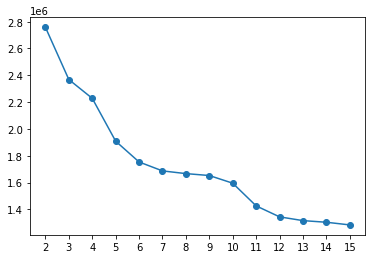

In [16]:
# Lloyd with random initialization and different K values
xplot = []
yplot = []
for k in range(2,16):
  sse = 0
  xplot.append(k)
  clusters, centroids = llyod(k, 60, x, 'rand')
  for i in range(k):
    for j in clusters[i]:
      sse = sse + np.sum((x[j] - centroids[i])**2)
  yplot.append(sse)
# plot of the cost
plt.plot(xplot, yplot, marker='o')
plt.xticks(xplot)
plt.show()

From above plot, I chose k=6 since the distortion starts decreasing after 6. Hence, we should use a clusters.

1.2 k-means++ initialization

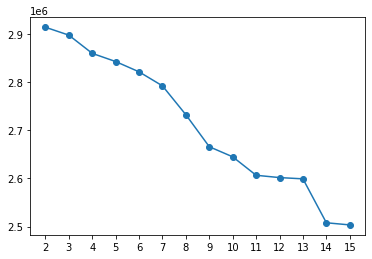

In [19]:
# Lloyd with k-means++ initialization and different K values
xplot = []
yplot = []
for k in range(2,16):
  sse = 0
  xplot.append(k)
  clusters, centroids = llyod(k, 60, x, 'plus')
  for i in range(k):
    for j in clusters[i]:
      sse = sse + np.sum((x[j] - centroids[i])**2)
  yplot.append(sse)
# plot of the cost
plt.plot(xplot, yplot, marker='o')
plt.xticks(xplot)
plt.show()

From above plot, I chose k=11 since the distortion starts decreasing after 11. Hence, we should use a clusters.

There is a fast drop between 13-14 which I am not sure why this happend.

Summary:

The best clustering seems cannot correspond to the true labels very well since I chose some K not equal to 10 and there are 10 true labels.

Classes do not always entirely fall within a single cluster. When k = 10, clusters sometime have similiar size, but most of the time I can still obtain a cluster with small size because of the random initialization technique.

2. Hague

In [ ]:
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(x)

In [ ]:
# single linkage
clusters = AgglomerativeClustering(affinity='euclidean', linkage='single')
clusters.fit_predict(scaled)

array([0, 0, 0, ..., 0, 0, 0])

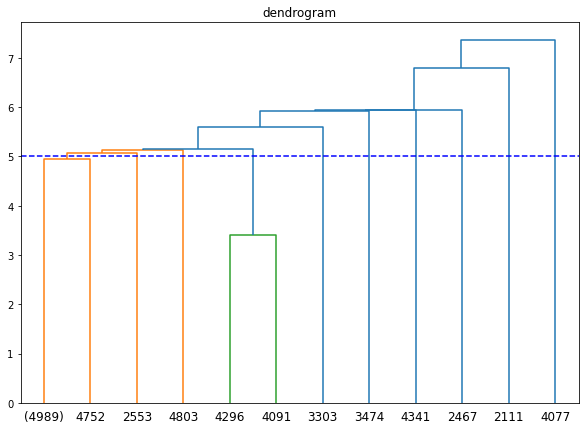

In [ ]:
z = linkage(scaled, "single")
plt.figure(figsize = (10, 7))
plt.title('dendrogram')
dend = dendrogram(z, 
                  orientation='top', 
                  distance_sort='descending', 
                  truncate_mode="level", 
                  p=9)
plt.axhline(y=5, color='b', linestyle='--')
plt.show()

I have two clustering options:
1. The reason why I chose this line is because I would like to have 10 clusters.
2. I also chose 3 as the optimal number of clusters because the plot has 4 colors.

In [ ]:
# average linkage
clusters2 = AgglomerativeClustering(affinity='euclidean', linkage='average')
clusters2.fit_predict(scaled)

array([0, 0, 0, ..., 0, 0, 0])

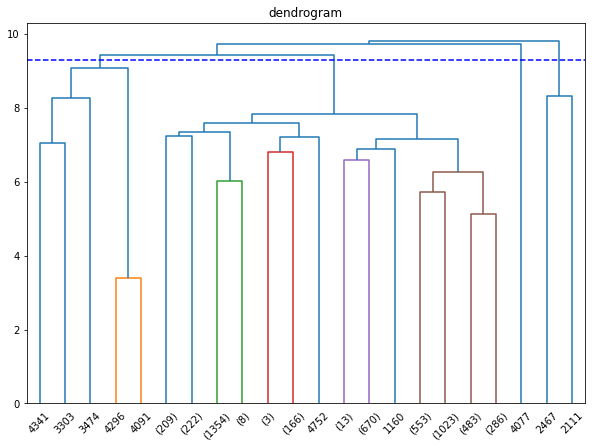

In [ ]:
z = linkage(scaled, "average")
plt.figure(figsize = (10, 7))
plt.title('dendrogram')
dend = dendrogram(z, orientation='top', distance_sort='descending', truncate_mode="level", p=6)
plt.axhline(y=9.3, color='b', linestyle='--')
plt.show()

I chose this line because I observed that the plot has 4 main parts (4341-4091, 209-4752, 13-286, 4077-2111).

Summary:

I used single linkage and average linkage, but they failed to predict labels. The clusters don't correspond to the true labels. We can also see this result in above two plots which they don't have a clear pattern of clusters.